# Real or Fake Competition - Data Exploration Notebook 

Within this file I'll be exploring the data as provided on the Kaggle competition website. It'll be semi-structured but true to my thought process as I encounter the data for the first time. 

### Notebook Strucuture: 
1. Data Ingestion
2. Feature Extraction 
3. Modelling 

In [13]:
# Import statements
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer 
from torch.utils.data import Dataset

/Users/shaemckenna/Programs/real_or_fake/rof/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Ingestion

In [12]:
train_dir = "data/train/"
train_labels = "data/train.csv"

# Reading in labels 
df = pd.read_csv(train_labels)
df_labels = df["real_text_id"]

# Reading in and appending text data + label to data[]
i = 0 
data = []
for dirpath, dirnames, filenames in sorted(os.walk(train_dir)): 
    try:
        with open(os.path.join(dirpath, filenames[0]), 'r', encoding='utf-8') as f1:
            text1 = f1.read().strip()
        with open(os.path.join(dirpath, filenames[1]), 'r', encoding='utf-8') as f2:
            text2 = f2.read().strip()

        # Appending text from file 1 and file 2 as well as real data label
        data.append((text1, text2, df_labels[i]))
    except:
        continue 

    i += 1

# Converting data[] to a Pandas DF
train_df = pd.DataFrame(data, columns=['file_1', 'file_2', "real_file_label"])
train_df.head()

,file_1,file_2,real_file_label
0,The VIRSA (Visible Infrared Survey Telescope A...,The China relay network has released a signifi...,1
1,China\nThe goal of this project involves achie...,The project aims to achieve an accuracy level ...,2
2,Scientists can learn about how galaxies form a...,Dinosaur eggshells offer clues about what dino...,1
3,China\nThe study suggests that multiple star s...,The importance for understanding how stars evo...,2
4,Dinosaur Rex was excited about his new toy set...,Analyzing how fast stars rotate within a galax...,2


## Feature Extraction

The below section will attempt to extract features from the messages. 

### Number of Characters in Real vs Fake Messages
The first code block will look into the number of characters between real and fake messages.

In [ ]:
label_file = "data/train.csv"
label_data = pd.read_csv(label_file)

real_msg_lengths = []
fake_msg_lengths = []

for index, row in train_df.iterrows():
    file_1, file_2 = row["file_1"], row["file_2"]
    file_1_len = len(file_1)
    file_2_len = len(file_2)
    print(f"Length of File 1: {file_1_len}, Length of File 2: {file_2_len}")

    if label_data['real_text_id'][index] == 1:
        real_msg_lengths.append(file_1_len)
        fake_msg_lengths.append(file_2_len)
    else:
        real_msg_lengths.append(file_2_len)
        fake_msg_lengths.append(file_1_len)



Length of File 1: 2196, Length of File 2: 2018
Length of File 1: 3124, Length of File 2: 936
Length of File 1: 1139, Length of File 2: 801
Length of File 1: 1774, Length of File 2: 1869
Length of File 1: 195, Length of File 2: 871
Length of File 1: 1364, Length of File 2: 1498
Length of File 1: 1197, Length of File 2: 906
Length of File 1: 1435, Length of File 2: 1008
Length of File 1: 887, Length of File 2: 592
Length of File 1: 1030, Length of File 2: 1218
Length of File 1: 1857, Length of File 2: 0
Length of File 1: 1246, Length of File 2: 874
Length of File 1: 1648, Length of File 2: 285
Length of File 1: 1333, Length of File 2: 1683
Length of File 1: 0, Length of File 2: 1788
Length of File 1: 912, Length of File 2: 672
Length of File 1: 1216, Length of File 2: 69
Length of File 1: 1788, Length of File 2: 1118
Length of File 1: 1385, Length of File 2: 2544
Length of File 1: 1444, Length of File 2: 1833
Length of File 1: 1903, Length of File 2: 1068
Length of File 1: 1827, Length o

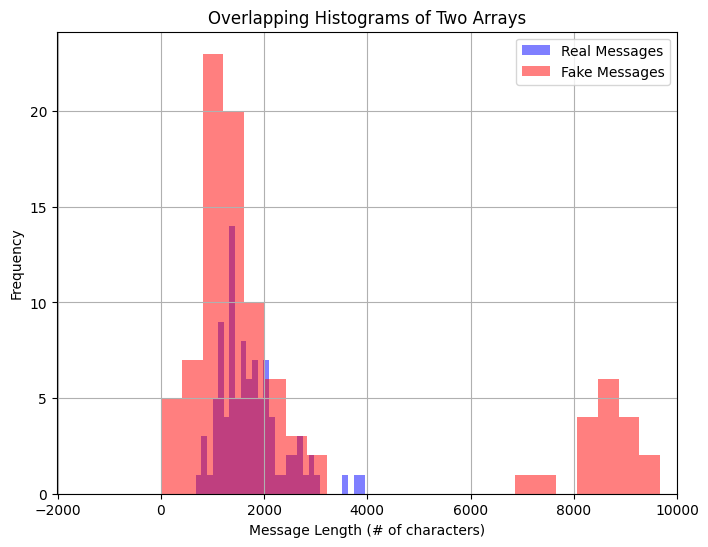

In [95]:
plt.figure(figsize=(8, 6))

plt.hist(real_msg_lengths, bins=30, alpha=0.5, label='Real Messages', color='blue')
plt.hist(fake_msg_lengths, bins=100, alpha=0.5, label='Fake Messages', color='red')

plt.xlabel('Message Length (# of characters)')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Two Arrays')
plt.xlim(right=10000)
plt.legend() 
plt.grid(True)
plt.show()

There seems to be no significant difference in the distributions of character lengths between real and fake messages. 

### Number of Special Characters in Real vs Fake Messages

In [104]:
label_file = "data/train.csv"
label_data = pd.read_csv(label_file)


real_msg_special_lengths = []
fake_msg_special_lengths = []

for index, row in train_df.iterrows():
    file_1, file_2 = row["file_1"], row["file_2"]
    file_1_special_len = len(re.findall(r'[^\w\s]', file_1))
    file_2_special_len = len(re.findall(r'[^\w\s]', file_2))
    print(f"Special Character in File 1: {file_1_special_len}, Special Character in File 2: {file_2_special_len}")

    if label_data['real_text_id'][index] == 1:
        real_msg_special_lengths.append(file_1_special_len)
        fake_msg_special_lengths.append(file_2_special_len)
    else:
        real_msg_special_lengths.append(file_2_special_len)
        fake_msg_special_lengths.append(file_1_special_len)

Special Character in File 1: 32, Special Character in File 2: 34
Special Character in File 1: 47, Special Character in File 2: 24
Special Character in File 1: 18, Special Character in File 2: 9
Special Character in File 1: 52, Special Character in File 2: 17
Special Character in File 1: 6, Special Character in File 2: 19
Special Character in File 1: 31, Special Character in File 2: 23
Special Character in File 1: 15, Special Character in File 2: 19
Special Character in File 1: 36, Special Character in File 2: 21
Special Character in File 1: 16, Special Character in File 2: 9
Special Character in File 1: 15, Special Character in File 2: 20
Special Character in File 1: 40, Special Character in File 2: 0
Special Character in File 1: 13, Special Character in File 2: 8
Special Character in File 1: 27, Special Character in File 2: 0
Special Character in File 1: 30, Special Character in File 2: 39
Special Character in File 1: 0, Special Character in File 2: 20
Special Character in File 1: 21,

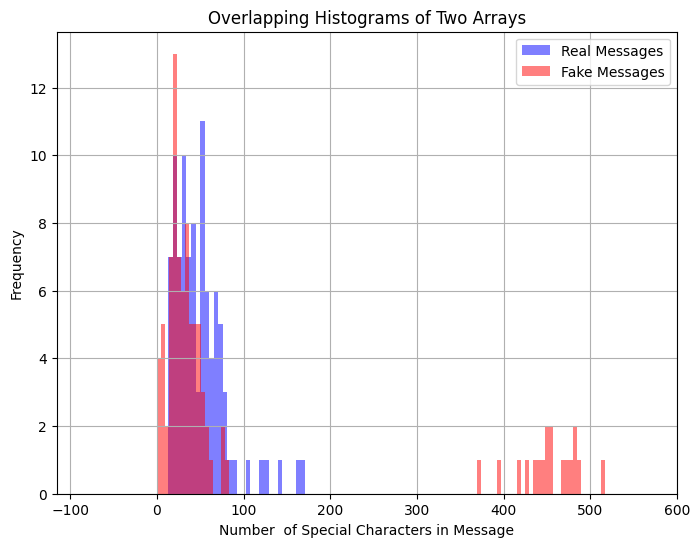

In [110]:
plt.figure(figsize=(8, 6))

plt.hist(real_msg_special_lengths, bins=30, alpha=0.5, label='Real Messages', color='blue')
plt.hist(fake_msg_special_lengths, bins=500, alpha=0.5, label='Fake Messages', color='red')

plt.xlabel('Number  of Special Characters in Message')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Two Arrays')
plt.legend() 
plt.xlim(right=600)
plt.grid(True)
plt.show()